In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

# 시설형 장기요양기관 입소자수

In [3]:
df = pd.read_csv("data/시설형 장기요양기관 입소자수.csv",encoding = 'utf-8-sig')

In [4]:
df.head()

,시/도,구,65세이상 노인인구,시설수,정원,현원,종사자수
0,서울,서울합계,"1,561,139",508,"15,467","13,962","9,680"
1,서울,종로구,"28,311",10,364,340,258
2,서울,중구,"24,174",3,83,81,68
3,서울,용산구,"39,779",4,203,204,143
4,서울,성동구,"45,435",6,418,386,251


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   시/도         246 non-null    object
 1   구           246 non-null    object
 2   65세이상 노인인구  246 non-null    object
 3   시설수         246 non-null    object
 4   정원          246 non-null    object
 5   현원          246 non-null    object
 6   종사자수        246 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [6]:
df.columns

Index(['시/도', '구', '65세이상 노인인구', '시설수', '정원', '현원', '종사자수'], dtype='object')

In [7]:
a = ['시/도', '구', '65세이상 노인인구', '시설수', '정원', '현원', '종사자수']

In [8]:
#콤마삭제
for i in a:
    df[i] = df[i].str.replace(',','')

In [9]:
#int변경 
for i in a:
    df[i] = df[i].astype(float, errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시/도         246 non-null    object 
 1   구           246 non-null    object 
 2   65세이상 노인인구  246 non-null    float64
 3   시설수         246 non-null    float64
 4   정원          246 non-null    float64
 5   현원          246 non-null    float64
 6   종사자수        246 non-null    float64
dtypes: float64(5), object(2)
memory usage: 13.6+ KB


In [11]:
#지역칼럼추가
df.insert(0, '지역', df['시/도'] + df['구'])

In [56]:
a = ('지역', '시설수', '정원','현원', '종사자수')

In [58]:
df2 = df.loc[:,a]

In [59]:
df3 = df2[df2['지역'].str.contains("합계")]

In [60]:
df3['지역'] = df3['지역'].str.split('').str[3:5].str.join('')

/var/folders/gw/2f6prwyn0kj6f1ksrvqg41340000gn/T/ipykernel_17328/3786374461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['지역'] = df3['지역'].str.split('').str[3:5].str.join('')


In [64]:
b=df3.sort_values("시설수",ascending=False)
b

,지역,시설수,정원,현원,종사자수
83,경기,1926.0,65649.0,55079.0,36844.0
0,서울,508.0,15467.0,13962.0,9680.0
52,인천,429.0,15736.0,12807.0,8684.0
200,경북,410.0,14631.0,11795.0,7971.0
115,강원,325.0,10829.0,9065.0,6487.0
146,충남,312.0,10905.0,9172.0,6383.0
134,충북,305.0,10050.0,8477.0,5626.0
177,전남,304.0,9367.0,8100.0,5470.0
43,대구,256.0,8315.0,7359.0,5205.0
224,경남,242.0,10888.0,9291.0,6199.0


In [73]:
b['시설수'].sum()

5725.0

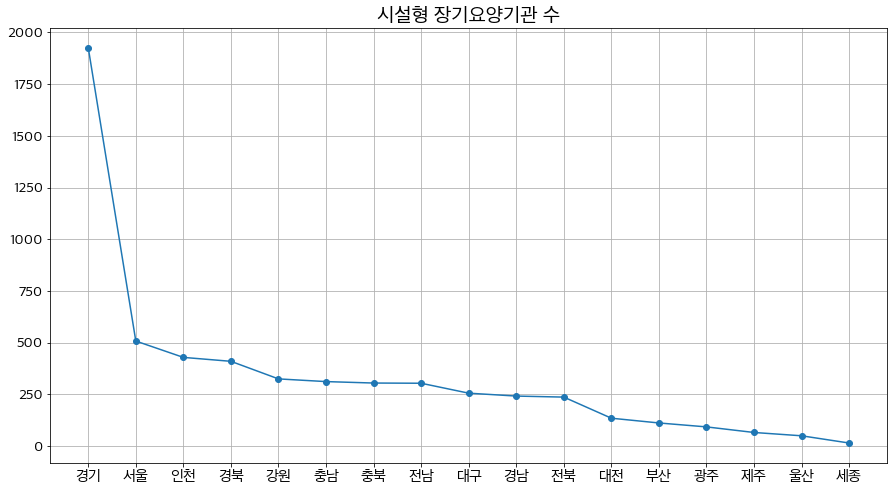

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(b['지역'],b['시설수'],marker='o')
plt.title('시설형 장기요양기관 수',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(True);

# 시설형 장기요양기관 전문인력 현황

In [17]:
dff = pd.read_csv("data/장기요양기관 전문인력현황.csv",encoding = 'euc-kr')

In [18]:
# - 제거 
dff.replace("-",0,inplace=True)

In [19]:
dff.columns

Index(['시·군·구별(1)', '시·군·구별(2)', '계(사회복지사)', '계(의사(계약의사포함))', '계(간호사)',
       '계(간호조무사)', '계(치과위생사)', '계(물리(작업)치료사)', '계(요양보호사)', '계(영양사)',
       '계(사회복지사).1', '재가(의사(계약의사포함))', '재가(간호사)', '재가(간호조무사)', '재가(치과위생사)',
       '재가(물리(작업)치료사)', '재가(요양보호사)', '재가(영양사)', '시설(사회복지사)', '시설(계약의사포함)',
       '시설(간호사)', '시설(간호조무사)', '시설(치과위생사)', '시설(물리(작업)치료사)', '시설(요양보호사)',
       '시설(영양사)'],
      dtype='object')

In [20]:
a = ['시·군·구별(1)', '시·군·구별(2)', '계(사회복지사)', '계(의사(계약의사포함))', '계(간호사)',
       '계(간호조무사)', '계(치과위생사)', '계(물리(작업)치료사)', '계(요양보호사)', '계(영양사)',
       '계(사회복지사).1', '재가(의사(계약의사포함))', '재가(간호사)', '재가(간호조무사)', '재가(치과위생사)',
       '재가(물리(작업)치료사)', '재가(요양보호사)', '재가(영양사)', '시설(사회복지사)', '시설(계약의사포함)',
       '시설(간호사)', '시설(간호조무사)', '시설(치과위생사)', '시설(물리(작업)치료사)', '시설(요양보호사)',
       '시설(영양사)']

In [21]:
#int변경 
for i in a:
    dff[i] = dff[i].astype(int, errors='ignore')

In [22]:
#지역칼럼추가
dff.insert(0, '지역', dff['시·군·구별(1)'] + dff['시·군·구별(2)'])

In [23]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   지역              267 non-null    object
 1   시·군·구별(1)       267 non-null    object
 2   시·군·구별(2)       267 non-null    object
 3   계(사회복지사)        267 non-null    int64 
 4   계(의사(계약의사포함))   267 non-null    int64 
 5   계(간호사)          267 non-null    int64 
 6   계(간호조무사)        267 non-null    int64 
 7   계(치과위생사)        267 non-null    int64 
 8   계(물리(작업)치료사)    267 non-null    int64 
 9   계(요양보호사)        267 non-null    int64 
 10  계(영양사)          267 non-null    int64 
 11  계(사회복지사).1      267 non-null    int64 
 12  재가(의사(계약의사포함))  267 non-null    int64 
 13  재가(간호사)         267 non-null    int64 
 14  재가(간호조무사)       267 non-null    int64 
 15  재가(치과위생사)       267 non-null    int64 
 16  재가(물리(작업)치료사)   267 non-null    int64 
 17  재가(요양보호사)       267 non-null    int64 
 18  재가(영양사)   

In [24]:
b = ('지역','시설(사회복지사)', '시설(계약의사포함)',
       '시설(간호사)', '시설(간호조무사)', '시설(치과위생사)', '시설(물리(작업)치료사)', '시설(요양보호사)',
       '시설(영양사)')

In [25]:
dff2 = dff.loc[:,b]

## merge

In [26]:
df3 = df2.merge(dff2, on='지역', how='left')

In [27]:
df3

,지역,시설수,정원,현원,종사자수,시설(사회복지사),시설(계약의사포함),시설(간호사),시설(간호조무사),시설(치과위생사),시설(물리(작업)치료사),시설(요양보호사),시설(영양사)
0,서울서울합계,508.0,15467.0,13962.0,9680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울종로구,10.0,364.0,340.0,258.0,14.0,7.0,10.0,15.0,0.0,6.0,170.0,3.0
2,서울중구,3.0,83.0,81.0,68.0,3.0,2.0,1.0,5.0,0.0,1.0,42.0,1.0
3,서울용산구,4.0,203.0,204.0,143.0,10.0,4.0,7.0,5.0,0.0,2.0,91.0,2.0
4,서울성동구,6.0,418.0,386.0,251.0,11.0,4.0,16.0,7.0,0.0,7.0,169.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,경남거창군,9.0,398.0,340.0,225.0,13.0,3.0,3.0,13.0,0.0,4.0,149.0,4.0
242,경남합천군,6.0,517.0,424.0,268.0,13.0,6.0,4.0,15.0,0.0,7.0,176.0,6.0
243,제주제주합계,66.0,3864.0,3365.0,2291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,제주제주시,45.0,2676.0,2281.0,1547.0,79.0,27.0,42.0,79.0,0.0,36.0,1008.0,23.0


# 시설형 장기요양기관 간호사수

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             246 non-null    object 
 1   시설수            246 non-null    float64
 2   정원             246 non-null    float64
 3   현원             246 non-null    float64
 4   종사자수           246 non-null    float64
 5   시설(사회복지사)      217 non-null    float64
 6   시설(계약의사포함)     217 non-null    float64
 7   시설(간호사)        217 non-null    float64
 8   시설(간호조무사)      217 non-null    float64
 9   시설(치과위생사)      217 non-null    float64
 10  시설(물리(작업)치료사)  217 non-null    float64
 11  시설(요양보호사)      217 non-null    float64
 12  시설(영양사)        217 non-null    float64
dtypes: float64(12), object(1)
memory usage: 26.9+ KB


In [29]:
#간호(조무)사 컬럼 생성
df3.insert(6, '간호(조무)사', df3['시설(간호사)'] + df3['시설(간호조무사)'])

In [30]:
#간호사비율 (입소자 25명당 1명)
df3.insert(6, '간호사비율', (df3['현원'] / 25))

In [31]:
a = (df3['간호사비율']>df3['간호(조무)사'])
a.sum()

1

In [32]:
#간호인력기준미달 1곳
df3.loc[a,:]

,지역,시설수,정원,현원,종사자수,시설(사회복지사),간호사비율,간호(조무)사,시설(계약의사포함),시설(간호사),시설(간호조무사),시설(치과위생사),시설(물리(작업)치료사),시설(요양보호사),시설(영양사)
211,경북군위군,4.0,146.0,129.0,88.0,7.0,5.16,5.0,1.0,0.0,5.0,0.0,3.0,54.0,2.0


# 시설형 장기요양기관 요양보호사수

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             246 non-null    object 
 1   시설수            246 non-null    float64
 2   정원             246 non-null    float64
 3   현원             246 non-null    float64
 4   종사자수           246 non-null    float64
 5   시설(사회복지사)      217 non-null    float64
 6   간호사비율          246 non-null    float64
 7   간호(조무)사        217 non-null    float64
 8   시설(계약의사포함)     217 non-null    float64
 9   시설(간호사)        217 non-null    float64
 10  시설(간호조무사)      217 non-null    float64
 11  시설(치과위생사)      217 non-null    float64
 12  시설(물리(작업)치료사)  217 non-null    float64
 13  시설(요양보호사)      217 non-null    float64
 14  시설(영양사)        217 non-null    float64
dtypes: float64(14), object(1)
memory usage: 30.8+ KB


In [34]:
df3.insert(11, '요양보호사비율', (df3['현원'] / 2.5))

In [35]:
a = (df3['요양보호사비율']>df3['시설(요양보호사)'])

In [36]:
#요양보호사비율 비달
aa=df3.loc[a,:]
aa

,지역,시설수,정원,현원,종사자수,시설(사회복지사),간호사비율,간호(조무)사,시설(계약의사포함),시설(간호사),시설(간호조무사),요양보호사비율,시설(치과위생사),시설(물리(작업)치료사),시설(요양보호사),시설(영양사)
56,인천연수구,32.0,1213.0,895.0,567.0,34.0,35.80,53.0,21.0,6.0,47.0,358.0,0.0,9.0,349.0,3.0
77,울산남구,9.0,226.0,206.0,140.0,11.0,8.24,13.0,7.0,2.0,11.0,82.4,0.0,3.0,82.0,2.0
126,강원평창군,8.0,217.0,170.0,110.0,3.0,6.80,11.0,2.0,1.0,10.0,68.0,0.0,2.0,66.0,1.0
174,전북순창군,5.0,147.0,140.0,99.0,6.0,5.60,6.0,3.0,1.0,5.0,56.0,0.0,2.0,55.0,2.0
178,전남목포시,31.0,951.0,784.0,510.0,35.0,31.36,47.0,14.0,3.0,44.0,313.6,0.0,12.0,311.0,4.0
188,전남화순군,14.0,447.0,395.0,238.0,19.0,15.80,21.0,4.0,1.0,20.0,158.0,0.0,5.0,157.0,1.0
194,전남함평군,12.0,433.0,369.0,246.0,18.0,14.76,15.0,8.0,0.0,15.0,147.6,0.0,3.0,140.0,2.0
221,경북봉화군,6.0,360.0,323.0,209.0,6.0,12.92,15.0,6.0,2.0,13.0,129.2,0.0,5.0,128.0,5.0


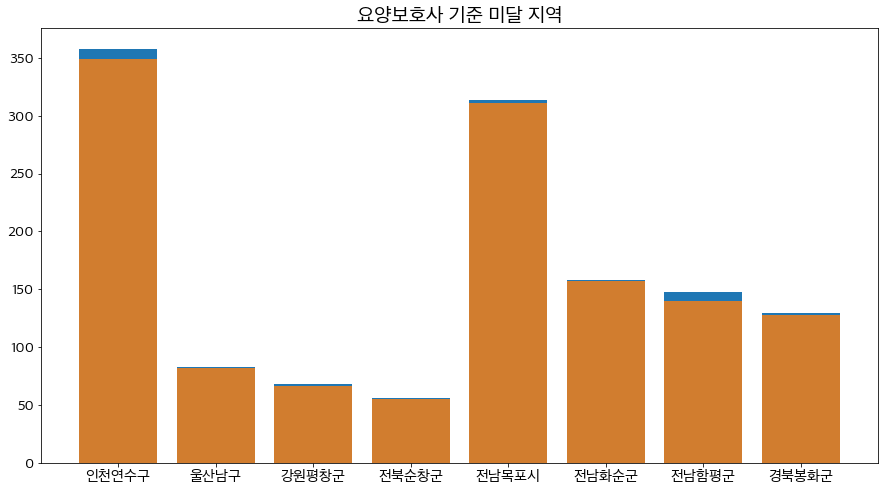

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(aa['지역'],aa['요양보호사비율'])
ax.bar(aa['지역'],aa['시설(요양보호사)'],alpha=0.8)
plt.title('요양보호사 기준 미달 지역',size=20)
plt.xticks(size=15)
plt.yticks(size=15);

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             246 non-null    object 
 1   시설수            246 non-null    float64
 2   정원             246 non-null    float64
 3   현원             246 non-null    float64
 4   종사자수           246 non-null    float64
 5   시설(사회복지사)      217 non-null    float64
 6   간호사비율          246 non-null    float64
 7   간호(조무)사        217 non-null    float64
 8   시설(계약의사포함)     217 non-null    float64
 9   시설(간호사)        217 non-null    float64
 10  시설(간호조무사)      217 non-null    float64
 11  요양보호사비율        246 non-null    float64
 12  시설(치과위생사)      217 non-null    float64
 13  시설(물리(작업)치료사)  217 non-null    float64
 14  시설(요양보호사)      217 non-null    float64
 15  시설(영양사)        217 non-null    float64
dtypes: float64(15), object(1)
memory usage: 32.7+ KB


In [39]:
df3.insert(12, '3교대판단', (df3['요양보호사비율']/3))

In [40]:
#3교대시 인당 7.5명을 8시간동안 돌봄 
(df3['현원']/df3['3교대판단']).value_counts()

7.5    156
7.5     47
7.5     43
dtype: int64

In [41]:
df3.insert(12, '2교대판단', (df3['요양보호사비율']/2))

In [42]:
#2교대시 인당 5명을 12시간동안 돌봄 
(df3['현원']/df3['2교대판단']).value_counts()

5.0    246
dtype: int64

In [43]:
df3.head(100)

,지역,시설수,정원,현원,종사자수,시설(사회복지사),간호사비율,간호(조무)사,시설(계약의사포함),시설(간호사),시설(간호조무사),요양보호사비율,2교대판단,3교대판단,시설(치과위생사),시설(물리(작업)치료사),시설(요양보호사),시설(영양사)
0,서울서울합계,508.0,15467.0,13962.0,9680.0,NaN,558.48,NaN,NaN,NaN,NaN,5584.8,2792.4,1861.600000,NaN,NaN,NaN,NaN
1,서울종로구,10.0,364.0,340.0,258.0,14.0,13.60,25.0,7.0,10.0,15.0,136.0,68.0,45.333333,0.0,6.0,170.0,3.0
2,서울중구,3.0,83.0,81.0,68.0,3.0,3.24,6.0,2.0,1.0,5.0,32.4,16.2,10.800000,0.0,1.0,42.0,1.0
3,서울용산구,4.0,203.0,204.0,143.0,10.0,8.16,12.0,4.0,7.0,5.0,81.6,40.8,27.200000,0.0,2.0,91.0,2.0
4,서울성동구,6.0,418.0,386.0,251.0,11.0,15.44,23.0,4.0,16.0,7.0,154.4,77.2,51.466667,0.0,7.0,169.0,1.0
5,서울광진구,20.0,595.0,556.0,368.0,19.0,22.24,36.0,14.0,8.0,28.0,222.4,111.2,74.133333,0.0,8.0,243.0,4.0
6,서울동대문구,25.0,408.0,386.0,264.0,11.0,15.44,32.0,13.0,7.0,25.0,154.4,77.2,51.466667,0.0,3.0,164.0,1.0
7,서울중랑구,48.0,1201.0,1097.0,740.0,48.0,43.88,87.0,16.0,11.0,76.0,438.8,219.4,146.266667,0.0,11.0,497.0,4.0
8,서울성북구,21.0,757.0,651.0,431.0,26.0,26.04,37.0,14.0,9.0,28.0,260.4,130.2,86.800000,0.0,10.0,310.0,2.0
9,서울강북구,31.0,707.0,676.0,462.0,27.0,27.04,49.0,11.0,2.0,47.0,270.4,135.2,90.133333,0.0,8.0,297.0,4.0


In [44]:
ff = pd.DataFrame([['2교대','12','5'],
                   ['3교대', '8','7.5']],columns=['교대','시간','인원'])
ff

,교대,시간,인원
0,2교대,12,5
1,3교대,8,7.5


In [45]:
ff.columns

Index(['교대', '시간', '인원'], dtype='object')

In [46]:
ff['시간'] = ff['시간'].astype(int)

In [47]:
ff['인원'] = ff['인원'].astype(float)

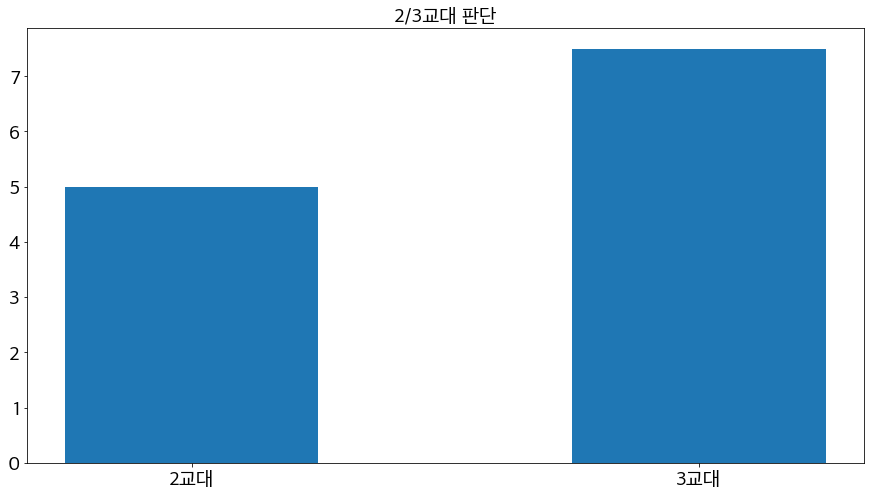

In [85]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ff['교대'],ff['인원'],width=0.5)
plt.title('2/3교대 판단',size=20)
plt.xticks(size=20)
plt.yticks(size=20);